# Title- Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
###### Binary classification 
---

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

----

### Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

 


---
### Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

In [2]:
load_app_config()
DIRECTORY="kaggle_titanic"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'Survived'
input_path = get_datafolder_path()

{'UAT': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'PRD': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'DEV': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'REG': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}}
Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path


In [3]:
def load_dataset(filename=TRAIN_FILE,response=RESPONSE):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns.values.tolist()
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns.values.tolist()
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
      
    return  input_dataset,feature_columns,response_column,continuous_vars,categorical_vars


In [4]:
train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(filename=TRAIN_FILE,response=RESPONSE)
train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]


 input file is :F:\DataSource\kaggle_titanic\train.csv loaded.
Continous Variables
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [5]:
test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars  = load_dataset(filename=TEST_FILE,response=RESPONSE)
test_X =[]
test_y=[]
if feature_columns:
    test_X = test_dataset[feature_columns]

if response_column:
    test_y = test_dataset[feature_columns]
   

 input file is :F:\DataSource\kaggle_titanic\test.csv loaded.
Continous Variables
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
from collections import Counter
def detect_outliers(dataset,noutliers,columns):
    outlier_indices = []
    for column in columns:
        # 1st quartile (25%)
        Q1 = np.percentile(dataset[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(dataset[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataset[(dataset[column] < Q1 - outlier_step) | (dataset[column] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
         
    outlier_indices = Counter(outlier_indices)
     
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > noutliers )
    return multiple_outliers 
        
Outliers_to_drop = detect_outliers(train_dataset,2,["Age","SibSp","Parch","Fare"])
train_dataset.loc[Outliers_to_drop]
train_dataset = train_dataset.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]

F:\Anaconda2\envs\machinelearning\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


### 2.Summarize Data 
#### a) Descriptive statistics
#### b) Data visualizations


In [7]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"info"))
    print(input_dataset.info())
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"data header"))
    print(X.head().to_string())
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
 
    print(y.groupby(response_column)[response_column].count())
    ##print("<{0} {1} {0}>".format("="*40,"Correlation"))
    ##print(input_dataset.corr(method='pearson'))

In [8]:
pd.set_option('display.width', 120)
pd.set_option('precision', 4)
display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)
#display_data_descriptives(test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars)
print(test_dataset.info())

<======================================== info ========================================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB
None
<======================================== feature columns ========================================>
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<======================================== data header ========================================>
   PassengerId  Pcla

In [9]:
categorical = ['Sex', 'Embarked','SibSp','Parch','Pclass']
def bar_plots(train_dataset,categorical):
    fig = plt.figure(figsize=(16,12))
    size =len(categorical)
     
    for i in range(size):
        #counts=train_dataset.groupby(categorical[i])['Survived'].value_counts()
        #print("Dataset group by {0} ".format(categorical[i]))
        #print(counts)
        ax = fig.add_subplot(3, 2, i+1)
        sns.barplot(x=categorical[i], y="Survived", data=train_dataset,ax=ax)
    plt.tight_layout()

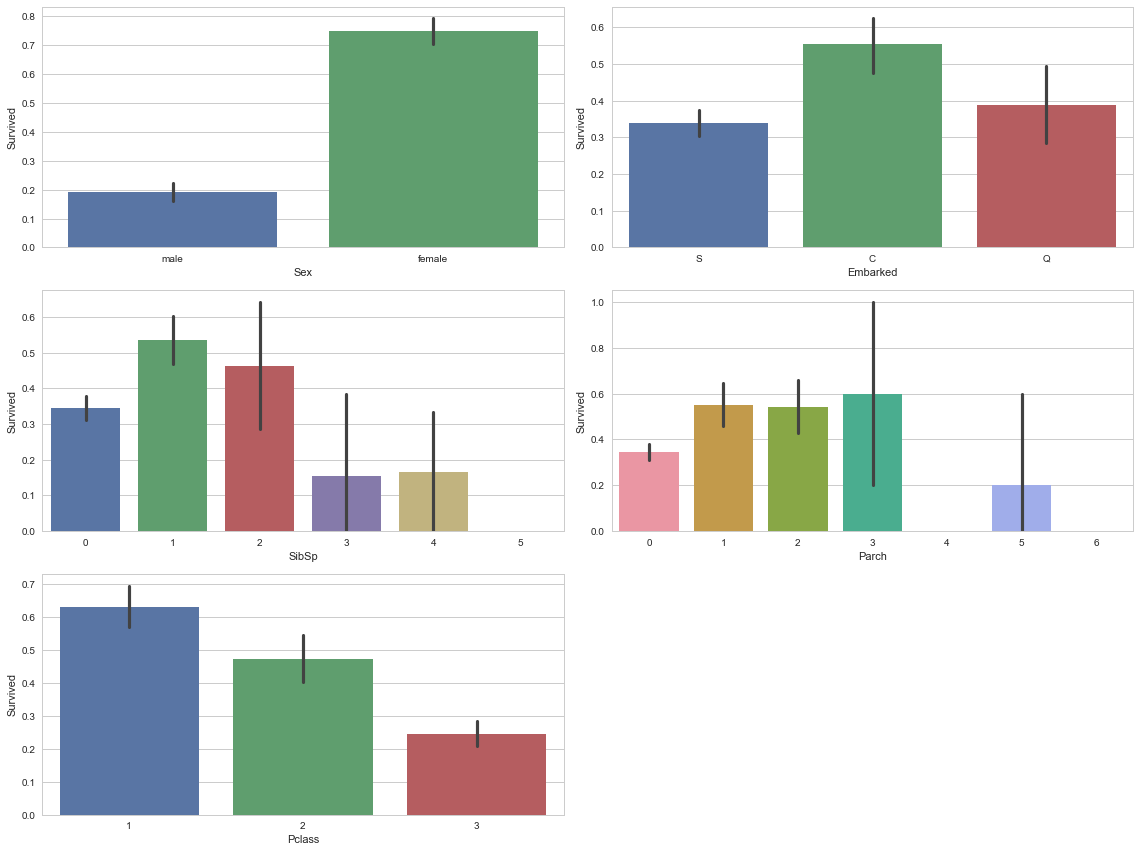

In [10]:
sns.set(style="whitegrid", color_codes=True)

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

bar_plots(train_dataset,categorical)

### Inferences  from bar plots  
##### Survival rate of female is more than males in all passenger categories
##### Survival rate for passenger class 3 is least
##### Survival rate of  passengers boarded at Embarked  at  C is greater than others
##### Passengers havings siblings survived better  than  zero siblings
##### Passengers travelling alone had less chances of survival than families 



In [11]:
#g  = sns.factorplot(x="Pclass", hue="Sex", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=flatui);
#g1 = sns.factorplot(x="Embarked", hue="Sex", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=flatui);   
#g2 = sns.factorplot(x="SibSp", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=sns.color_palette("husl",2)); 
#g3 = sns.factorplot(x="Parch", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=sns.color_palette("husl",2)); 

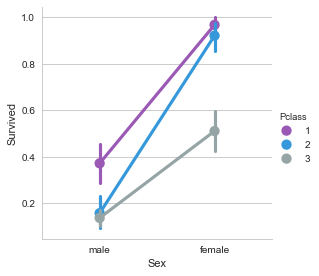

In [12]:
g = sns.factorplot(x='Sex',y='Survived',hue='Pclass',size=4, aspect=1,palette=flatui ,data =train_dataset)

##### Women  from 1st  and 2nd class have 100 % survival
##### Men from 2nd and 3rd Pclass have only around 10% survival chance.

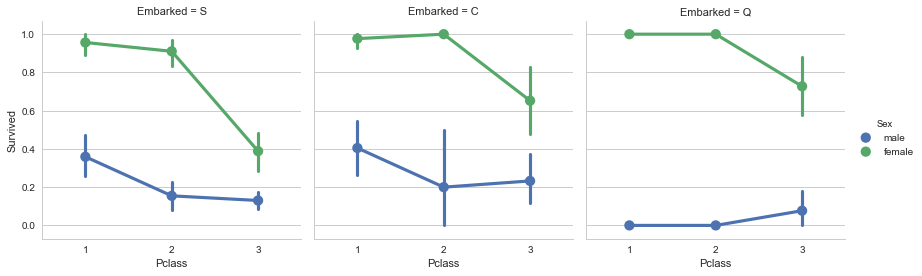

In [13]:
g1 =sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_dataset)

##### Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3

In [14]:
#ax  =sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_dataset, split=True)


---  
### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transforms

In [15]:
from sklearn.preprocessing import Imputer


In [16]:
full_dataset = [train_dataset,test_dataset]
 
## identity the null data sets 
for dataset in full_dataset:
    print("<{0} {1} {0}>".format("="*40,"Columns having null values"))
    check_null = dataset.isnull().sum()[dataset.isnull().sum()>0] 
    print(check_null)
     

<======================================== Columns having null values ========================================>
Age         170
Cabin       680
Embarked      2
dtype: int64
<======================================== Columns having null values ========================================>
Age       86
Fare       1
Cabin    327
dtype: int64


In [17]:
for dataset in full_dataset:
    #dataset.drop('Cabin',axis =1,inplace=True)
    dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

####  Transform  sex  label in numerical categorical value, assign mean age  to null 
#####  Fill in missing Embarked values 

In [18]:
sex_mapping= {'male':0,'female':1}
for dataset in full_dataset:
    dataset['Sex'] =dataset['Sex'].map(sex_mapping)
    median_age = math.ceil(dataset["Age"].median())
    #dataset['Age'].fillna(median_age, inplace=True)
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    age_null_index =list(dataset["Age"][dataset["Age"].isnull()].index)
    print(len(age_null_index))
    for each_index in age_null_index:
        median_age = math.ceil(dataset["Age"].median())
        pred_age = dataset["Age"][((dataset['SibSp'] == dataset.iloc[each_index]["SibSp"]) &
                                   (dataset['Parch'] == dataset.iloc[each_index]["Parch"]) &
                                   (dataset['Pclass'] == dataset.iloc[each_index]["Pclass"]))].median()
        if not np.isnan(pred_age) :
            dataset['Age'].iloc[each_index] = pred_age
        else :
            dataset['Age'].iloc[each_index] = pred_age

for dataset in full_dataset:
    print("<{0} {1} {0}>".format("="*40,"Columns having null values"))
    check_null = dataset.isnull().sum()[dataset.isnull().sum()>0] 
    print(check_null)

test_dataset[test_dataset["Age"].isnull()]

170


F:\Anaconda2\envs\machinelearning\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


86
<======================================== Columns having null values ========================================>
Series([], dtype: int64)
<======================================== Columns having null values ========================================>
Age     3
Fare    1
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
132,1024,3,"Lefebre, Mrs. Frank (Frances)",1,NaN,0,4,4133,25.4667,X,S
342,1234,3,"Sage, Mr. John George",0,NaN,1,9,CA. 2343,69.5500,X,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",1,NaN,1,9,CA. 2343,69.5500,X,S


In [19]:
test_dataset['Age'].fillna(median_age, inplace=True)
full_dataset = [train_dataset,test_dataset]

In [20]:
from sklearn import feature_extraction
def one_hot_dataframe(data,columns,replace=False):
    fe_vec= feature_extraction.DictVectorizer()
    make_dict = lambda row :dict((column,row[column]) for column in  columns)
    vector_data=pd.DataFrame(fe_vec.fit_transform( data[columns].apply(make_dict, axis=1)).toarray())
    vector_data.columns = fe_vec.get_feature_names()
    vector_data.index= data.index
    if replace:
        data = data.drop(columns, axis=1)
        data = data.join(vector_data)
    return data,vector_data


 

In [21]:
for dataset in full_dataset:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [22]:
train_dataset.groupby('Title')['Survived'].value_counts()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    1            23
          0            16
Miss      1           125
          0            52
Mlle      1             2
Mme       1             1
Mr        0           432
          1            81
Mrs       1            99
          0            26
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

In [23]:
test_dataset.groupby('Title')['Name'].count()   

Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: Name, dtype: int64

In [24]:
for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.5897
1,Miss,0.7111
2,Mr,0.1579
3,Mrs,0.7937
4,Other,0.3478


####  Transform Fare 

In [25]:
for dataset in full_dataset:
    dataset['Fare'] = dataset['Fare'].fillna(train_dataset['Fare'].median())
 

In [26]:

#for dataset in full_dataset:
#    tickets=[]
#    for each_ticket in list(dataset["Ticket"]):
#        if not each_ticket.isdigit():
#            tickets.append(each_ticket.replace(".","").replace("/","").strip().split(' ')[0])
#        else:
#            tickets.append("X")
#    dataset["Ticket"] = tickets

            

In [27]:
train_dataset,train_dataset_n = one_hot_dataframe(train_dataset, ['Pclass','Embarked', 'Sex','Title','Cabin'], replace=True)
test_dataset,test_dataset_n = one_hot_dataframe(test_dataset, ['Pclass','Embarked', 'Sex','Title','Cabin'], replace=True)

In [28]:
full_dataset = [train_dataset,test_dataset]
train_dataset['AgeBand'] = pd.cut(train_dataset['Age'], 5)
train_dataset['AgeBand'] 

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
5      (16.336, 32.252]
6      (48.168, 64.084]
7        (0.34, 16.336]
8      (16.336, 32.252]
9        (0.34, 16.336]
10       (0.34, 16.336]
11     (48.168, 64.084]
12     (16.336, 32.252]
13     (32.252, 48.168]
14       (0.34, 16.336]
15     (48.168, 64.084]
16       (0.34, 16.336]
17     (16.336, 32.252]
18     (16.336, 32.252]
19     (16.336, 32.252]
20     (32.252, 48.168]
21     (32.252, 48.168]
22       (0.34, 16.336]
23     (16.336, 32.252]
24       (0.34, 16.336]
25     (32.252, 48.168]
26     (16.336, 32.252]
27     (16.336, 32.252]
28     (16.336, 32.252]
29     (32.252, 48.168]
             ...       
851    (32.252, 48.168]
852    (16.336, 32.252]
853    (32.252, 48.168]
854    (16.336, 32.252]
855    (32.252, 48.168]
856    (16.336, 32.252]
857    (16.336, 32.252]
858    (16.336, 32.252]
859      (0.34, 16.336]
860    (16.336, 32.252]
861    (32.252, 

In [29]:
for dataset in full_dataset:
    dataset.loc[ dataset['Age'] <= 16.336, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.336) & (dataset['Age'] <= 32.252), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.252) & (dataset['Age'] <= 48.168), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.168) & (dataset['Age'] <= 64.084), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64.084, 'Age'] = 4

In [30]:
train_dataset['FareBand'] = pd.qcut(train_dataset['Fare'], 4)
print (train_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

for dataset in full_dataset:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

          FareBand  Survived
0  (-0.001, 7.896]    0.1973
1  (7.896, 14.454]    0.3036
2   (14.454, 30.5]    0.4562
3  (30.5, 512.329]    0.5945


In [31]:
for dataset in full_dataset:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1
    #dataset['IsAlone'] = 0
    #dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
    


#### Feature Selection

In [32]:
features_drop = ['Name', 'SibSp', 'Parch','FamilySize','Ticket']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset = train_dataset.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)
### we will drop Cabin T
X_train = train_dataset.drop(['Survived','Cabin=T'], axis=1)
y_train = train_dataset['Survived']
X_test = test_dataset.drop("PassengerId", axis=1).copy()



In [33]:
all_features  =set(X_test.columns.values).intersection(set(X_train.columns.values))
all_features =list(all_features)

X_train.shape, y_train.shape, X_test.shape
 

((881, 24), (881,), (418, 24))

In [34]:
X_train =X_train[all_features]
X_test = X_test[all_features]
X_train.shape, y_train.shape, X_test.shape
print(all_features)

['Title=Miss', 'Embarked=C', 'Title=Mrs', 'Cabin=G', 'Cabin=F', 'Title=Mr', 'LargeF', 'Cabin=A', 'MedF', 'Cabin=X', 'Pclass', 'Title=Master', 'Fare', 'Cabin=E', 'Cabin=D', 'Title=Other', 'SmallF', 'Single', 'Embarked=Q', 'Embarked=S', 'Sex', 'Age', 'Cabin=B', 'Cabin=C']


### 4. Evaluate Algorithms
####  a) Split-out validation dataset
####  b) Test options and evaluation metric
####  c) Spot Check Algorithms
####  d) Compare Algorithms

In [35]:
X_train.head()

,Title=Miss,Embarked=C,Title=Mrs,Cabin=G,Cabin=F,Title=Mr,LargeF,Cabin=A,MedF,Cabin=X,...,Cabin=D,Title=Other,SmallF,Single,Embarked=Q,Embarked=S,Sex,Age,Cabin=B,Cabin=C
0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,1.0,...,0.0,0.0,1,0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0,0.0,...,0.0,0.0,1,0,0.0,0.0,1.0,2.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,...,0.0,0.0,0,1,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0,0.0,...,0.0,0.0,1,0,0.0,1.0,1.0,2.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,1.0,...,0.0,0.0,0,1,0.0,1.0,0.0,2.0,0.0,0.0


In [36]:
from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression
test_size = 0.33
seed = 7

X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(X_train, y_train, test_size=test_size,random_state=seed)

In [37]:
logrmodel = LogisticRegression()
logrmodel.fit(X_trainmodel, y_trainmodel.values.ravel())
result = logrmodel.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))

Accuracy: 85.254


In [38]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(X_trainmodel, y_trainmodel.values.ravel())
#y_pred_linear_svc = lin_svc.predict(X_test)
acc_linear_svc = round(lin_svc.score(X_trainmodel, y_trainmodel) * 100, 2)
print (acc_linear_svc)

85.08


In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def train_and_evaluate(model, X_train, y_train, t_splits =10,seed=7):
    model.fit(X_train, y_train)
    print ("Coefficient of determination on training set:",model.score(X_train, y_train))
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(n_splits= t_splits,shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(scores)
    print ("Average coefficient of determination using {0}-fold crossvalidation:{1}".format(t_splits,np.mean(scores)))

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Accuracy of LR is 0.8491525423728813 with variance 0.039713133945288054
Accuracy of DT is 0.7966101694915254 with variance 0.05968412495477632
Accuracy of KNN is 0.8118644067796609 with variance 0.03427753968840115
Accuracy of GB is 0.7999999999999999 with variance 0.0706192090033887
Accuracy of SVC is 0.8525423728813559 with variance 0.027382193934582237
Accuracy of RFC is 0.8203389830508476 with variance 0.03650959191277629


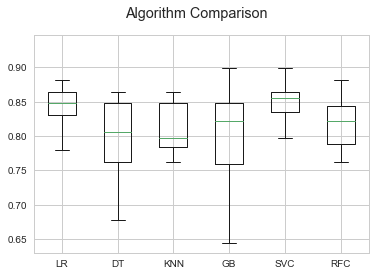

In [61]:
models = []
models.append(('LR', LogisticRegression()))
###models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('RFC',RandomForestClassifier(n_estimators=300,random_state=0)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_trainmodel, y_trainmodel.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Accuracy of {0} is {1} with variance {2}".format(name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [43]:
svc=SVC()
svc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,svc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Classification report
             precision    recall  f1-score   support

          0       0.79      0.86      0.82       170
          1       0.78      0.67      0.72       121

avg / total       0.78      0.78      0.78       291

Confusion matrix
[[147  23]
 [ 40  81]]


In [63]:
rfc =RandomForestClassifier(n_estimators=300,random_state=0 )
print(rfc)
rfc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Classification report
             precision    recall  f1-score   support

          0       0.78      0.86      0.82       170
          1       0.77      0.65      0.71       121

avg / total       0.78      0.78      0.77       291

Confusion matrix
[[147  23]
 [ 42  79]]


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid, cv=5,n_jobs =1)
grid_search.fit(X_trainmodel,y_trainmodel.values.ravel())
print("Test set score: {:.2f}".format(grid_search.score(X_val, y_val)))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
Test set score: 0.78


In [46]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.85


In [47]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [77]:
rfc= RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [10],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


grid_search = GridSearchCV(rfc,param_grid = rf_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs =4)

grid_search.fit(X_trainmodel,y_trainmodel.values.ravel())

rfc_best = grid_search.best_estimator_

 #Best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


Best parameters: {'max_depth': 10, 'max_features': 1, 'min_samples_split': 3, 'n_estimators': 300, 'bootstrap': False, 'min_samples_leaf': 3, 'criterion': 'gini'}
Best cross-validation score: 0.85
Best estimator:
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [80]:
rfc =RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
print(rfc)
rfc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

print(X_trainmodel.info())
print(X_test.info())
#X_test.to_csv('tranform_test.csv', index=False)
y_pred_result=rfc.predict(X_test)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Classification report
             precision    recall  f1-score   support

          0       0.79      0.86      0.83       170
          1       0.78      0.68      0.73       121

avg / total       0.79      0.79      0.78       291

Confusion matrix
[[147  23]
 [ 39  82]]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 202 to 175
Data columns (total 24 columns):
Title=Miss      590 non-null float64
Embarked=C      590 non-null float64
Title=Mrs       590 non-null float64
Cabin=G         590 non-null float64
Cabin=F         590 non-null float64
Title=Mr        590 non-null float64
LargeF          

In [79]:
submission = pd.DataFrame({
        "PassengerId": test_X["PassengerId"],
        "Survived": y_pred_result
    })
submission.to_csv('submission_new_0131.csv', index=False)